# 3D Animations
    Taylor Rubalcava
    Sep 5 2024

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

In [121]:
animation.writer = animation.writers['ffmpeg']

Using  the FuncAnimation class to animate the function $y = \sin(x + 3t)$ where $x \in [0, 2\pi]$, and t ranges from 0 to 10 seconds.
Embed your animation into the notebook.

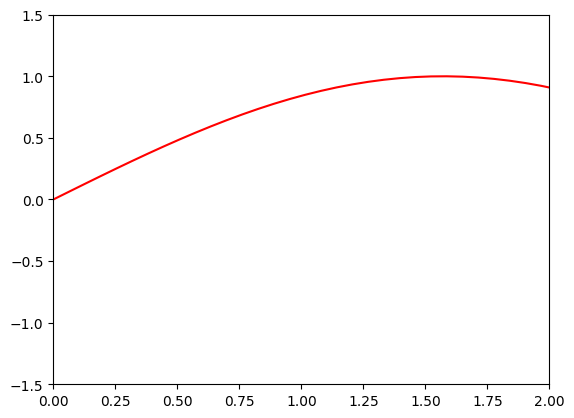

In [122]:
# Setting up the x space
xs = np.linspace(0,2 * np.pi,100)

# Setting up the figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([0,2])
plt.ylim([-1.5,1.5])

# Creating an empty line object
line, = ax.plot([],[],"r-")

# Defining the update function
def update(t):
    line.set_data(xs, np.sin(xs+3*t))

ani = FuncAnimation(fig, update, frames = xs, interval = 101)
animation.writer = animation.writers["ffmpeg"]

In [123]:
# Saving the animation
ani.save("./Data/waveanimation.mp4")

<video src="./Data/waveanimation.mp4" controls> 

The orbits for Mercury, Venus, Earth, and Mars are stored in the file `orbits.npz`. The file contains four NumPy arrays: `mercury`, `venus`, `earth`, and `mars`. The first column of each array contains the x-coordinates, the second column contains the y-coordinates, and the third column contians the z-coordinates, all relative to the Sun, and expressed in AU (astronomical units, the average distance between Earth and the Sun, approximately 150 million
kilometers).

Using `np.load('orbits.npz')` to load the data for the four planets' orbits. Create a 3D plot of the planet orbits, the starting positions of each planet as a point, and the position of the sun as a point, and compare your results with Figure 1.1. Make sure to include a legend. 

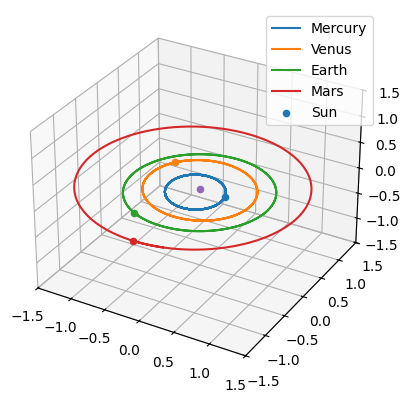

In [124]:
# Loading the data
orbital_data = np.load("./Data/orbits.npz")

# Splitting up the data
mercury = orbital_data["mercury"]
venus = orbital_data["venus"]
earth = orbital_data["earth"]
mars = orbital_data["mars"]

# Creating the 3D Plot
fig = plt.figure()

# Creating the #3D axis object
ax = fig.add_subplot(111, projection = "3d")
ax.set_xlim3d(-1.5,1.5)
ax.set_ylim3d(-1.5,1.5)
ax.set_zlim3d(-1.5,1.5)

# Adding mercury to the plot
ax.plot3D(mercury[:,0], mercury[:,1], mercury[:,2])
ax.plot3D(venus[:,0], venus[:,1], venus[:,2])
ax.plot3D(earth[:,0], earth[:,1], earth[:,2])
ax.plot3D(mars[:,0], mars[:,1], mars[:,2])

# Adding the points
ax.scatter(mercury[0,0], mercury[0,1], mercury[0,2])
ax.scatter(venus[0,0], venus[0,1], venus[0,2])
ax.scatter(earth[0,0], earth[0,1], earth[0,2])
ax.scatter(mars[0,0], mars[0,1], mars[0,2])
ax.scatter(0,0,0)

# Adding the legend
ax.legend(["Mercury", "Venus", "Earth", "Mars", "Sun"])

Making a surface plot of the bivariate normal density function given by:

$$f(\mathbf{x}) = \frac{1}{\sqrt{\det(2\pi\Sigma)}}\exp[-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^{T}\Sigma^{-1}(\mathbf{x}-\mathbf{\mu})]$$

Where $\mathbf{x} = [x,y]^T \in \mathbb{R}^2$, $\mathbf{\mu} = [0,0]^T$ is the mean vector, and: $$\Sigma = \begin{bmatrix} 1 & 3/5 \\ 3/5 & 2 \end{bmatrix}$$ is the covariance matrix.

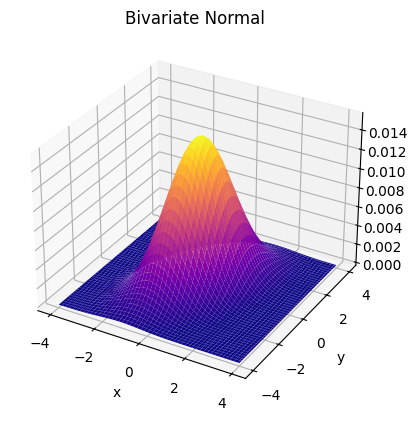

In [125]:
# Creating the meshgrid
# Cole helped me a bit with this
X = np.linspace(-4, 4, 100)
Y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(X,Y)
Z = np.zeros(X.shape)
sigma = np.array([[1, 3/5],[3/5,2]])

# Calculating z
for x_loc in range(len(X)):
    for y_loc in range(len(Y)):
        x_bar = np.array([X[x_loc, y_loc], Y[x_loc,y_loc]])
        Z[x_loc,y_loc] = (1/np.linalg.det(2*np.pi*sigma)) * np.exp(-0.5 * x_bar.T @ np.linalg.inv(sigma) @ x_bar)


# Setting up the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
plt.title("Bivariate Normal")

# Plotting the surface
ax.plot_surface(X,Y,Z, cmap="plasma")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Using the data in vibration.npz to produce a surface animation of the solution
to the wave equation for an elastic rectangular membrane. The file contains three NumPy arrays: `X`, `Y`, `Z`. `X` and `Y` are meshgrids of shape `(300,200)` corresponding to 300 points in
the y-direction and 200 points in the x-direction, all corresponding to a 2x3 rectangle with one corner at the origin. `Z` is of shape `(150,300,200)`, giving the height of the vibrating membrane at each (x,y) point for 150 values of time. In the language of partial differential equations, this is the solution to the following intital/boundary value problem for the wave equation:

$$u_{tt} = 6^2(u_{xx}+u_{yy})$$
$$(x,y) \in [0,2]\times[0,3],t \in [0,5]$$
$$u(t,0,y)=u(t,2,y)=u(t,x,0)=u(t,x,3) = 0$$
$$u(0,x,y) = xy(2-x)(3-y)$$

Load the data with `np.load('vibration.npz')`. Create a 3D surface animation of the vibrating membrane. Embed the animation in the notebook.

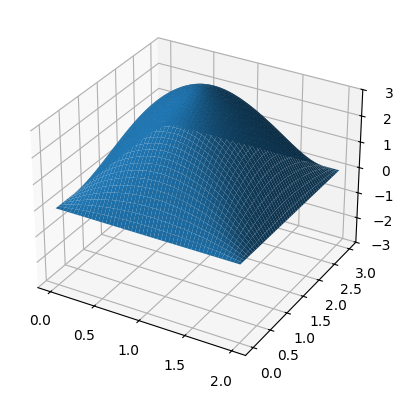

In [126]:
# Importing the vibration information
X = np.load("./Data/vibration.npz/X.npy")
Y = np.load("./Data/vibration.npz/Y.npy")
Z = np.load("./Data/vibration.npz/Z.npy")

# Creating the figure
fig = plt.figure()

# Creating the #3D axis object
ax = fig.add_subplot(111, projection = "3d")

def update(t):
    ax.clear()
    ax.set_zlim3d([-3,3])
    ax.plot_surface(X,Y,Z[t,:,:])


ani = FuncAnimation(fig, update, frames=range(150), interval = 33.5)
animation.writer = animation.writers["ffmpeg"]

In [127]:
# Saving the animation
ani.save("./Data/surfaceanimation.mp4")

<video src="./Data/surfaceanimation.mp4" controls> 